<a href="https://colab.research.google.com/github/KibandiMacharia/Linear_RegressionTaskOne/blob/main/Predictive_Models_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Definition:
You are expected to generate a fake Nairobi Office Price Simulated dataset of size 100 with One
feature 𝒙 (office size assume a suitable distribution) and one target 𝑦 (office price also assume a
suitable distribution).
Write class logic for Mean Squared Error to be used as your Performance Measure Technique
and Gradient Descent as your learning algorithm
Set random initial values for slope (m) and y-intercept (c) and train an intelligent linear regression
model of your dataset above then plot the line of best fit
Use the above learnt line to predict the office price when the size is 100 sq. ft.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

Generating a dummy dataset

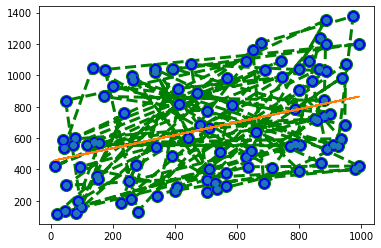

In [2]:
x = np.random.randint(low=0, high=1000, size=100)
delta = np.random.uniform(0,1000, size=(100,))
y = .4 * x +3 + delta

data = pd.DataFrame({"office_size" : x,
                     "office_price(target)"  : y
                     })

# plotting the points  
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
         
#Line of best fit
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

In [3]:
data

,office_size,office_price(target)
0,629,475.863561
1,885,1351.367658
2,77,602.325004
3,568,983.890541
4,80,122.605381
...,...,...
95,947,683.336552
96,472,885.512920
97,744,988.840163
98,410,914.740820


In [4]:
data.shape

(100, 2)

We transform the data set into a data frame
office.feature_names is the column names of the data and price.target is our target variable or the price of the office

In [5]:
df_x = pd.DataFrame(data, columns=["office_size"])
df_y = pd.DataFrame(data, columns=["office_price(target)"])
df_x.head()

,office_size
0,629
1,885
2,77
3,568
4,80


Visualizing relationship between the feature and target

Get some statistics from our data set, count, mean standard deviation etc.

In [6]:
df_x.describe()

,office_size
count,100.000000
mean,519.990000
std,305.645549
min,12.000000
25%,257.250000
50%,519.500000
75%,801.500000
max,993.000000


start the linear regression model

In [7]:
reg = linear_model.LinearRegression()

Split the data into 80% training and 20% testing data

In [8]:
#x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

Training the model with the training data

In [9]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Printing the weights for x feature

In [10]:
print(reg.coef_)

[[0.3272827]]


Printing the price predictions of test data

In [11]:
y_pred = reg.predict(x_test)
print(y_pred)

[[526.86787802]
 [643.05323717]
 [723.89206452]
 [558.28701739]
 [577.5966968 ]
 [754.6566385 ]
 [677.41792086]
 [809.6401324 ]
 [698.36401378]
 [837.13187936]
 [603.77931295]
 [774.62088331]
 [737.9652207 ]
 [690.83651164]
 [639.78041015]
 [528.50429153]
 [586.10604705]
 [538.65005528]
 [774.29360061]
 [770.03892548]]


Target test values for comparison

In [12]:
print(y_test)

    office_price(target)
52            134.235111
24            264.733154
45            520.343498
14            574.648158
79            930.595979
67           1090.368223
73            769.636405
80            557.592978
3             983.890541
10           1200.325586
12            128.799563
25            392.389705
13           1034.977568
93            510.967599
59            482.377502
41            298.466031
48            187.101723
4             122.605381
65           1041.828944
22            787.246634


Calculating mean squared error

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#print(np.mean((y_pred-y_test)**2))

Mean Absolute Error: 274.69423511966073
Mean Squared Error: 91795.09425557293
Root Mean Squared Error: 302.97705235805057


Since we are dealing with random data, variance of data values is very high leading to the high MSE